# 可视化探索语义分割数据集

同济子豪兄 2023-1-31 6-11

## 进入`mmsegmentation`主目录

In [78]:
import os
os.chdir('D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mmsegmentation')

In [79]:
os.getcwd()

'D:\\project\\Placental segmentation\\MMSegmentation_Tutorials-main\\mmsegmentation'

## 导入工具包

In [80]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [81]:
# 指定单张图像路径
img_path = 'D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mydata\img_dir\\train\\56.jpg'
mask_path = 'D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mydata\\ann_dir\\train\\56.png'

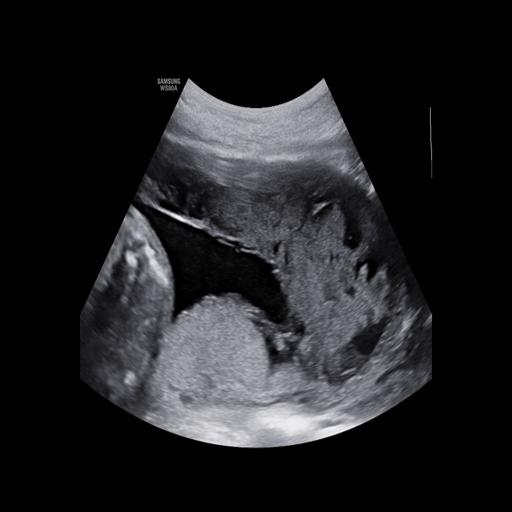

In [82]:
Image.open(img_path)

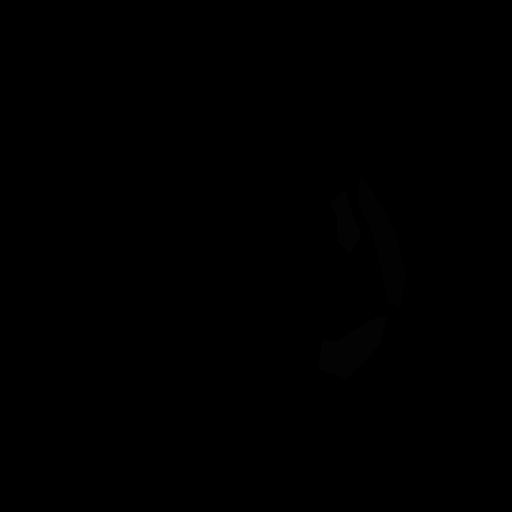

In [83]:
Image.open(mask_path)

In [84]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [85]:
img.shape

(512, 512, 3)

In [86]:
mask.shape

(512, 512, 3)

## mask灰度图标注含义

In [87]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 2, 3], dtype=uint8)

| 类别名称       | 类别语义    | 标注类别          | 灰度图像素值 |
|------------|---------| ----------------- | ------------ |
| /          | 背景      | /                 | 0            |
| red        | 胎盘陷窝    | 多段线（polygon） | 1            |
| green      | 胎盘后低回声带 | 多段线（polygon） | 2            |
| blue       | 宫颈形态    | 多段线（polygon） | 3            |
| seed-black | 膀胱线     | 多段线（polygon） | 4            |
| purple          | 胎盘位置    | 多段线（polygon） | 5            |

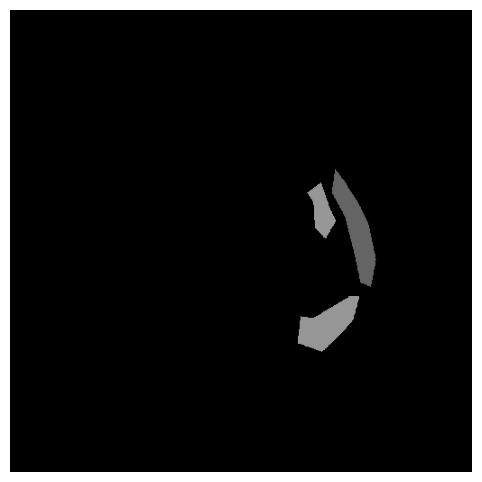

In [88]:
plt.figure(figsize=(10, 6))
plt.imshow(mask*50)
plt.axis('off')
plt.show()

## 将语义分割标注叠加在原图上显示

In [89]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['胎盘陷窝', [255,0,0]],
    ['胎盘后第回声带', [0,255,0]],
    ['宫颈形态', [0,0,255]],
    ['膀胱线', [128,128,128]],
    ['胎盘位置', [128,0,128]]
]

In [90]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [91]:
palette_dict

{0: [127, 127, 127],
 1: [255, 0, 0],
 2: [0, 255, 0],
 3: [0, 0, 255],
 4: [128, 128, 128],
 5: [128, 0, 128]}

In [92]:
mask = mask[:,:,0]

# 将整数ID，映射为对应类别的颜色
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# 将语义分割标注图和原图叠加显示
opacity = 0.2 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

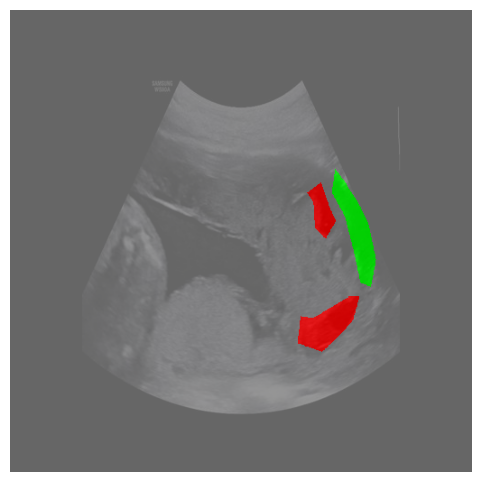

In [93]:
plt.figure(figsize=(10, 6))
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')
plt.show()

In [94]:
cv2.imwrite('outputs/D-1.jpg', label_viz)

False

## 批量可视化图像和标注

In [97]:
# 指定图像和标注路径

# 训练集
PATH_IMAGE = 'D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mydata\img_dir\\train'
PATH_MASKS = 'D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mydata\\ann_dir\\train'

# 测试集
# PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/val'
# PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/val'

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/D-2.jpg'

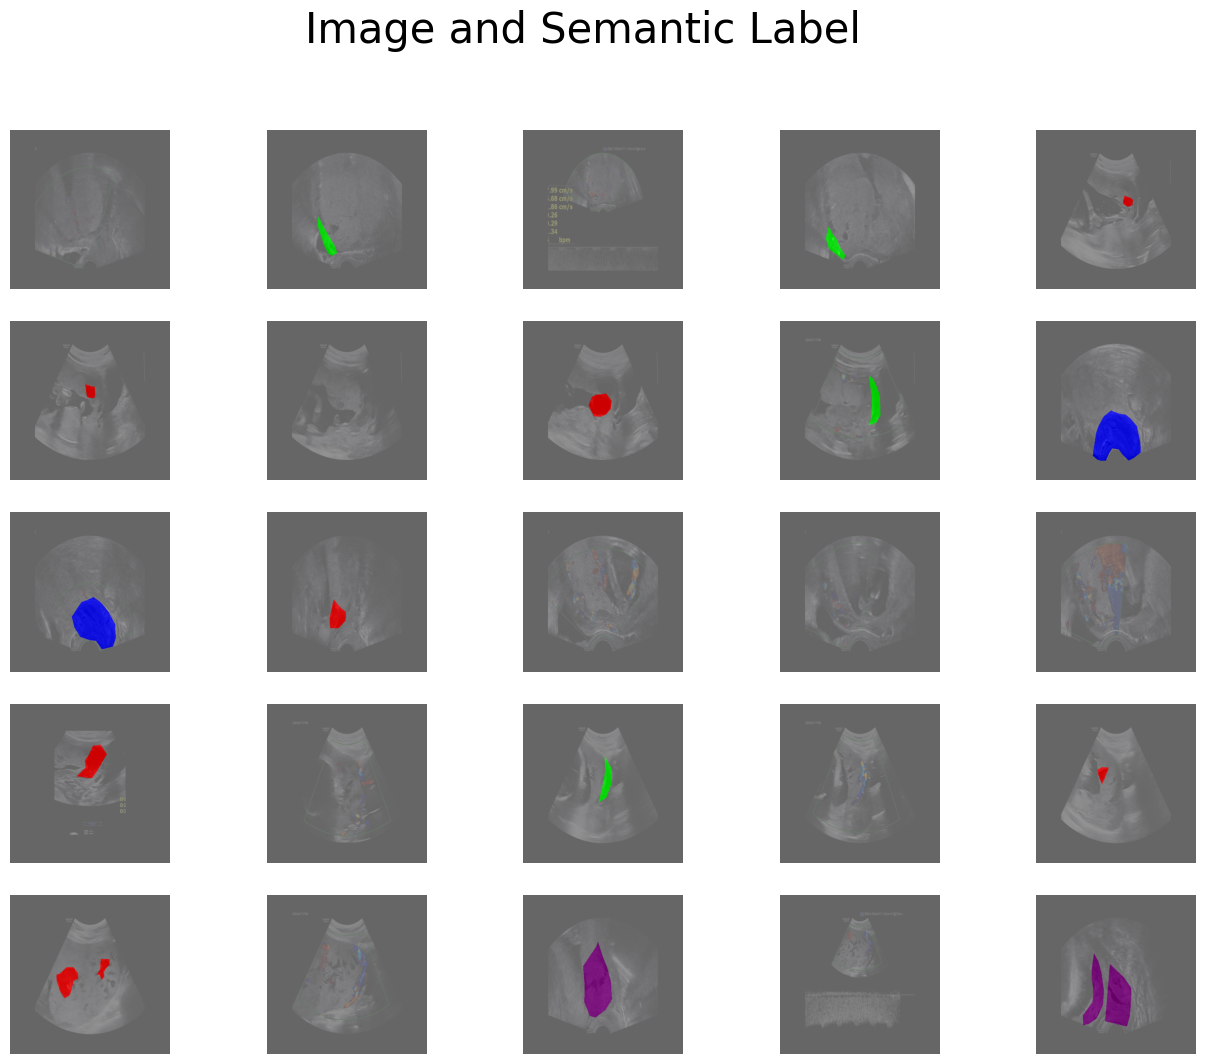

In [98]:
# n 行 n 列可视化
n = 5

# 透明度越大，可视化效果越接近原图
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
# plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()